In [5]:
import pandas as pd
from plotnine import *

# importing statsmodels (for linear regression in python)
import statsmodels.formula.api as smf

##### The number of cases is extracted from [China Judgement Online](https://wenshu.court.gov.cn/)
##### The other data is collected and cleaned from [China Census Data](http://www.stats.gov.cn/tjsj/pcsj/)

# Exploratory data analysis

This is your "clean notebook" for exploratory data viz. If you're just getting started, go to the `regressions-eda-scratchpad.ipynb` notebook and come back here once you've done some exploration and are getting ready to submit. 

This notebook doesn't have to tell a story from top-to-bottom, but the teaching team should be able to follow your logic as you explore. If you've come to a conclusion about something, put it in the title of the chart. If you have a takewaway or question, or are looking for feedback, put that in a markdown cell in text. This is your way to show the teaching team your exploratory data viz, and for us to give you feedback on it. 


## Load Data

Code for loading raw data like `pd.read_csv()` etc. -- will go into this section. 

In [57]:
pd.set_option('display.max_columns', None)
df1 = pd.read_excel('3year-gender-ratio.xlsx')
df2 = pd.read_excel('cases-other-factors.xlsx')
df3 = pd.read_excel('gdppc.xlsx')
df4 = pd.merge(df1, df2, on="region")
df = pd.merge(df4, df3, on="region")

In [58]:
df

,region,chinese,1990_born_m,1990_born_f,1990_mar_m,1990_mar_f,1990-undermar-m,1990-undermar-f,2000_born_m,2000_born_f,2000_mar_m,2000_mar_f,2010_born_m,2010_born_f,2010_mar_m,2010_mar_f,a_ratio_born,a_ratio_mar,b_ratio_born,b_ratio_mar,c_ratio_mar,c_ratio_born,a_ratio_under,case_number,a_urban_percentage,c_urban_percentage,c_population_male,c_population_female,c_minority_male,c_minority_female,c_illiterate_male_rate,c_illiterate_female_rate,地区,gdpoc_1990,gdpoc_2000,gdpoc_2010,gdpoc_2020
0,Beijing,北京市,74976,69358,2367241,2103177,1554058,1426111,10600,10111,555817,495584,823,750,536287,449677,108.100003,112.555482,104.836317,112.153944,119.260491,109.73,108.971742,2.0,86.20,87.55,11195390,10697705,517092,530837,0.39,1.42,北京市,1297.0,4533,12368,30126
1,Tianjin,天津市,71589,64833,1766138,1695795,1372927,1284485,13868,11541,443194,448790,1216,1075,433887,384546,110.420619,104.148084,120.162897,98.753092,112.830975,113.12,106.885405,8.0,80.43,84.70,7144949,6721060,222323,221158,0.68,2.20,天津市,1069.0,3598,9764,25691
2,Hebei,河北省,639940,568063,10980171,10623462,11931172,11242496,301594,262039,7903132,7741752,25652,21601,6228323,6147189,112.652998,103.357747,115.095081,102.084541,101.319855,118.75,106.125650,116.0,45.59,60.07,37679003,36931232,1647379,1573764,0.88,2.91,河北省,622.0,2484,6014,16467
3,Shanxi,山西省,334517,306459,5366486,4940513,5793928,5357639,153966,135545,3554091,3313510,8603,7695,2952173,2680204,109.155548,108.622040,113.590321,107.260609,110.147325,111.80,108.143307,47.0,49.79,62.53,17805148,17110468,61303,60552,0.83,2.08,山西省,604.0,1950,5263,13878
4,InnerMongolia,内蒙古自治区,224626,207192,4146318,3859064,4392688,4157114,68000,61297,2495956,2309307,4686,4132,1917442,1678656,108.414418,107.443618,110.935282,108.082468,114.224832,113.41,105.666768,46.0,57.04,67.48,12275274,11773881,2547409,2566209,2.06,5.68,内蒙古自治区,607.0,2058,5780,16567
5,Liaoning,辽宁省,320243,289960,8066439,7762021,6534129,6170089,97119,84983,3330329,3152494,5600,4854,2375300,2241675,110.443854,103.921891,114.280503,105.641089,105.960944,115.37,105.900077,28.0,64.05,72.14,21263529,21327878,3256517,3165273,0.56,1.45,辽宁省,836.0,2338,6671,17450
6,Jilin,吉林省,235318,217850,4953306,4756849,4607080,4375645,61751,55286,2618349,2448373,4715,3998,2118574,2063793,108.018361,104.129982,111.693738,106.942406,102.654384,117.93,105.289163,32.0,53.40,62.64,12018319,12055134,1035797,1051817,0.91,2.11,吉林省,804.0,2029,6341,16067
7,Heilongjiang,黑龙江省,318556,297725,7012433,6706475,6838519,6509746,78516,71710,3457179,3236912,5751,4903,2971365,2888094,106.996725,104.562128,109.491005,106.804850,102.883251,117.30,105.050474,6.0,56.49,65.61,15952468,15897620,580019,541457,0.93,2.14,黑龙江省,760.0,2136,6040,16168
8,Shanghai,上海市,77440,73631,2816485,2524537,1625429,1530044,5929,5373,331376,306815,828,821,489214,409535,105.173093,111.564418,110.348036,108.005150,119.455968,100.85,106.234134,11.0,89.30,89.30,12875211,11995684,203469,196341,0.70,2.96,上海市,1665.0,5572,13702,34911
9,Jiangsu,江苏省,732333,637592,12779379,12269614,11296203,10475975,179835,151227,6770581,7100881,14773,12040,4022284,4250074,114.859189,104.154695,118.917257,95.348465,94.640329,122.70,107.829610,59.0,62.01,73.44,43031586,41716430,311180,310034,1.27,4.90,江苏省,884.0,3591,9067,24198


### Clean data

As you do your exploration, you may find that you need to transform the data (for example you want to extract the brand of a car from the name column, or rename 0 and 1 in the `am` column to "automatic" and "manual". I'd reccomend putting any of that code here and re-running the notebook. That way, when you come back to the notebook later, the data processing code is all at the top and you can chart or analyze whatever you want after it. 

Feel free to add as many cells as you need in this section.

In [59]:
df['marriage_women_change'] = df['2010_mar_f'] - df['1990-undermar-f']

In [60]:
df_selected = df[['region','case_number',
                  'a_ratio_born','a_ratio_mar',
                  'b_ratio_born','b_ratio_mar',
                  'c_ratio_born','c_ratio_mar',
                  'a_ratio_under',
                  'a_urban_percentage','c_urban_percentage',
                  'c_population_male','c_population_female',
                  'c_minority_male','c_minority_female',
                  'c_illiterate_male_rate','c_illiterate_female_rate',
                  'marriage_women_change',
                  'gdpoc_1990','gdpoc_2000','gdpoc_2010','gdpoc_2020']]

In [61]:
df_selected['case_by_population'] = df_selected.case_number / (df_selected.c_population_male + df_selected.c_population_female)

/var/folders/9m/w7ffkstj051dnyjnyklwvwmr0000gn/T/ipykernel_69723/827809877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Explore the data

In [62]:
df_selected.head()

,region,case_number,a_ratio_born,a_ratio_mar,b_ratio_born,b_ratio_mar,c_ratio_born,c_ratio_mar,a_ratio_under,a_urban_percentage,c_urban_percentage,c_population_male,c_population_female,c_minority_male,c_minority_female,c_illiterate_male_rate,c_illiterate_female_rate,marriage_women_change,gdpoc_1990,gdpoc_2000,gdpoc_2010,gdpoc_2020,case_by_population
0,Beijing,2.0,108.100003,112.555482,104.836317,112.153944,109.73,119.260491,108.971742,86.20,87.55,11195390,10697705,517092,530837,0.39,1.42,-976434,1297.0,4533,12368,30126,9.135300e-08
1,Tianjin,8.0,110.420619,104.148084,120.162897,98.753092,113.12,112.830975,106.885405,80.43,84.70,7144949,6721060,222323,221158,0.68,2.20,-899939,1069.0,3598,9764,25691,5.769504e-07
2,Hebei,116.0,112.652998,103.357747,115.095081,102.084541,118.75,101.319855,106.125650,45.59,60.07,37679003,36931232,1647379,1573764,0.88,2.91,-5095307,622.0,2484,6014,16467,1.554746e-06
3,Shanxi,47.0,109.155548,108.622040,113.590321,107.260609,111.80,110.147325,108.143307,49.79,62.53,17805148,17110468,61303,60552,0.83,2.08,-2677435,604.0,1950,5263,13878,1.346103e-06
4,InnerMongolia,46.0,108.414418,107.443618,110.935282,108.082468,113.41,114.224832,105.666768,57.04,67.48,12275274,11773881,2547409,2566209,2.06,5.68,-2478458,607.0,2058,5780,16567,1.912749e-06


In [63]:
df_selected.dtypes

region                       object
case_number                 float64
a_ratio_born                float64
a_ratio_mar                 float64
b_ratio_born                float64
b_ratio_mar                 float64
c_ratio_born                float64
c_ratio_mar                 float64
a_ratio_under               float64
a_urban_percentage          float64
c_urban_percentage          float64
c_population_male             int64
c_population_female           int64
c_minority_male               int64
c_minority_female             int64
c_illiterate_male_rate      float64
c_illiterate_female_rate    float64
marriage_women_change         int64
gdpoc_1990                  float64
gdpoc_2000                    int64
gdpoc_2010                    int64
gdpoc_2020                    int64
case_by_population          float64
dtype: object

In [64]:
df_selected['marriage_ratio_change'] = df_selected.c_ratio_mar - df_selected.a_ratio_under

/var/folders/9m/w7ffkstj051dnyjnyklwvwmr0000gn/T/ipykernel_69723/534714023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [65]:
df_selected['c_mar_born_dif'] = df_selected.c_ratio_mar - df_selected.c_ratio_born

/var/folders/9m/w7ffkstj051dnyjnyklwvwmr0000gn/T/ipykernel_69723/3206425847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Summary Stats

This is the part of the data exploration where you get to understand what the columns are. You're welcome to pop open the data in excel as well to get a sense of it. At the very least, you'll want to run `.describe()` on your dataframe or dataframes. If you want to do a correlation matrix, you can use `.corr()` (sometimes I like to add `.round(2)` to the end of that so it doesn't report it out to too many decimal places)

In [66]:
df_selected.corr().round(1)

,case_number,a_ratio_born,a_ratio_mar,b_ratio_born,b_ratio_mar,c_ratio_born,c_ratio_mar,a_ratio_under,a_urban_percentage,c_urban_percentage,c_population_male,c_population_female,c_minority_male,c_minority_female,c_illiterate_male_rate,c_illiterate_female_rate,marriage_women_change,gdpoc_1990,gdpoc_2000,gdpoc_2010,gdpoc_2020,case_by_population,marriage_ratio_change,c_mar_born_dif
case_number,1.0,0.5,-0.0,0.5,0.1,0.6,-0.2,0.5,-0.4,-0.3,0.7,0.7,-0.1,-0.1,-0.2,-0.1,-0.4,-0.4,-0.2,-0.2,-0.2,0.8,-0.4,-0.5
a_ratio_born,0.5,1.0,-0.2,0.6,-0.2,0.5,-0.3,0.7,0.0,0.1,0.7,0.7,-0.2,-0.2,-0.4,-0.4,-0.5,-0.0,0.2,0.2,0.2,0.2,-0.5,-0.5
a_ratio_mar,-0.0,-0.2,1.0,0.2,0.8,-0.2,0.6,0.5,0.0,0.0,-0.1,-0.1,0.2,0.2,-0.0,0.0,0.4,0.1,0.0,0.0,0.0,-0.1,0.4,0.4
b_ratio_born,0.5,0.6,0.2,1.0,0.1,0.7,-0.2,0.7,-0.2,-0.1,0.6,0.6,-0.1,-0.1,-0.4,-0.3,-0.3,-0.2,-0.1,-0.1,-0.1,0.4,-0.4,-0.6
b_ratio_mar,0.1,-0.2,0.8,0.1,1.0,-0.1,0.6,0.4,-0.2,-0.3,-0.0,-0.0,0.4,0.4,0.0,0.0,0.4,-0.1,-0.2,-0.2,-0.3,0.1,0.5,0.4
c_ratio_born,0.6,0.5,-0.2,0.7,-0.1,1.0,-0.6,0.6,-0.3,-0.2,0.6,0.6,-0.2,-0.2,-0.4,-0.3,-0.6,-0.4,-0.2,-0.2,-0.2,0.5,-0.7,-0.9
c_ratio_mar,-0.2,-0.3,0.6,-0.2,0.6,-0.6,1.0,0.1,0.3,0.3,-0.4,-0.4,0.2,0.2,0.1,0.0,0.7,0.4,0.3,0.3,0.3,-0.2,1.0,0.9
a_ratio_under,0.5,0.7,0.5,0.7,0.4,0.6,0.1,1.0,-0.0,0.0,0.6,0.6,0.0,0.0,-0.5,-0.4,-0.2,-0.0,0.1,0.1,0.1,0.3,-0.2,-0.3
a_urban_percentage,-0.4,0.0,0.0,-0.2,-0.2,-0.3,0.3,-0.0,1.0,1.0,-0.2,-0.3,-0.3,-0.4,-0.5,-0.5,0.2,0.9,0.9,0.9,0.8,-0.3,0.3,0.3
c_urban_percentage,-0.3,0.1,0.0,-0.1,-0.3,-0.2,0.3,0.0,1.0,1.0,-0.2,-0.2,-0.4,-0.4,-0.6,-0.6,0.1,0.8,0.8,0.8,0.8,-0.3,0.3,0.2


### Plots (exploratory)

Remember, always plot your distributions. You may want to try some histograms on particular columns. 

Scatter plots could also help with understanding how variables relate to one another. 

Feel free to use any plot type you think will help you better understand the data. If you think you've got a takeaway or a question, you can put that takeaway or question in a markdown cell above or below the chart. Just to remind yourself and anyone you're asking for help from, the purpose of that plot. I also like to get into the habit of titling plots [DRAFT]-NOT FOR PUBLICATION since exploratory data viz can be misleading but you might pass them around to editors or colleagues as you try to understand the data.

/Users/angeline_jcq/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


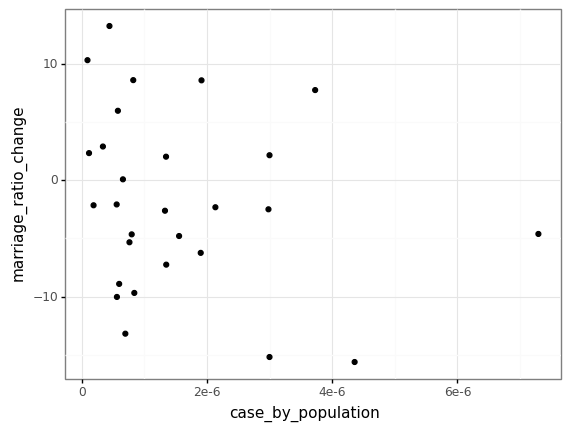

<ggplot: (333223461)>

In [24]:
(
    ggplot(df_selected)
    + aes(x='case_by_population', y='marriage_ratio_change')
    + geom_point()
    + theme_bw()
)

/Users/angeline_jcq/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


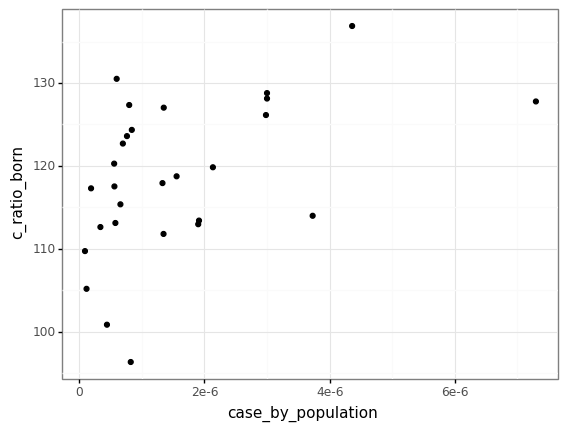

<ggplot: (354182141)>

In [28]:
(
    ggplot(df_selected)
    + aes(x='case_by_population', y='c_ratio_born')
    + geom_point()
    + theme_bw()
)

/Users/angeline_jcq/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


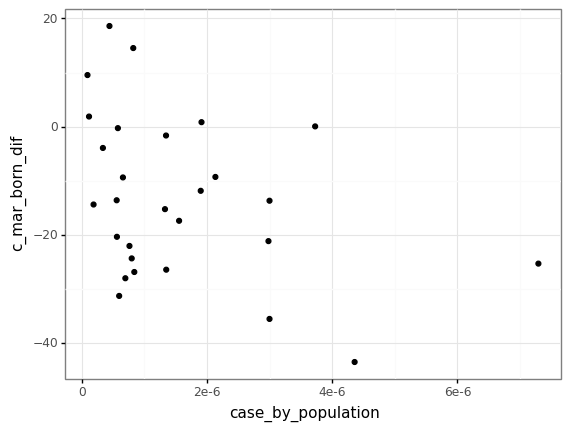

<ggplot: (353889028)>

In [38]:
(
    ggplot(df_selected)
    + aes(x='case_by_population', y='c_mar_born_dif')
    + geom_point()
    + theme_bw()
)

/Users/angeline_jcq/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


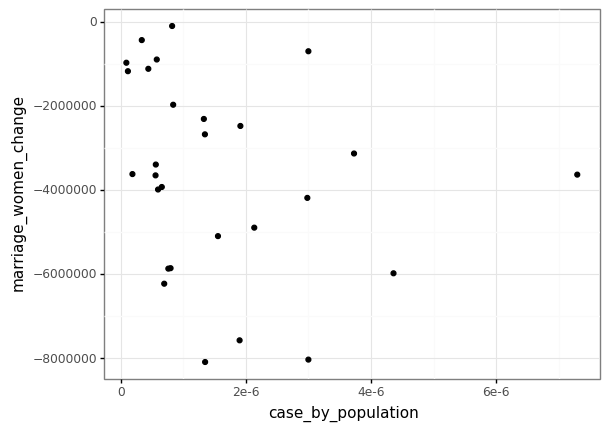

<ggplot: (344554789)>

In [49]:
(
    ggplot(df_selected)
    + aes(x='case_by_population', y='marriage_women_change')
    + geom_point()
    + theme_bw()
)

/Users/angeline_jcq/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


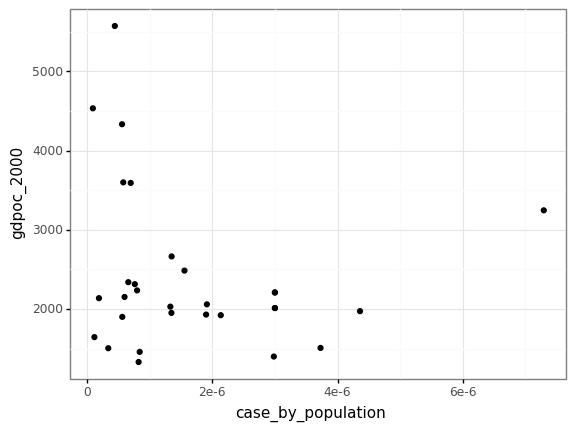

<ggplot: (354178624)>

In [69]:
(
    ggplot(df_selected)
    + aes(x='case_by_population', y='gdpoc_2000')
    + geom_point()
    + theme_bw()
)

### Regressions and Models (exploratory)

This is where you start using some of the more advanced statsitical techniques you've learned so far to understand the data better. Wondering if the differences between two means is significant? You want to try a t-test. Alternatively, this is a good place to play around with regressions to better understand how variables in your dataset relate to one another. You might want to put the takeaway from the regression model in the cell below, just so you don't forget what exploration you did and what it means.

In [33]:
import statsmodels.formula.api as smf
model = smf.ols("case_by_population ~ c_ratio_born", data=df_selected)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     case_by_population   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     7.143
Date:                Fri, 01 Apr 2022   Prob (F-statistic):             0.0128
Time:                        11:02:55   Log-Likelihood:                 337.90
No. Observations:                  28   AIC:                            -671.8
Df Residuals:                      26   BIC:                            -669.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -7.932e-06   3.57e-06     -2.225      0.035   -1.53e-05   -6.03e-07
c_ratio_born  8.012e-08      3e-08      2.673      0.013    1.85e-08    1.42e-07
==============================================================================
Omnibus:                       20.093   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.498
Skew:                           1.648   Prob(JB):                     6.48e-07
Kurtosis:                       6.683   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
model = smf.ols("case_by_population ~ c_ratio_born + gdpoc_2010", data=df_selected)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     case_by_population   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     4.855
Date:                Fri, 01 Apr 2022   Prob (F-statistic):             0.0158
Time:                        11:29:08   Log-Likelihood:                 363.23
No. Observations:                  30   AIC:                            -720.5
Df Residuals:                      27   BIC:                            -716.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -7.324e-06   3.65e-06     -2.006      0.055   -1.48e-05    1.65e-07
c_ratio_born  8.006e-08   2.88e-08      2.780      0.010     2.1e-08    1.39e-07
gdpoc_2010   -8.545e-11   1.07e-10     -0.802      0.429   -3.04e-10    1.33e-10
==============================================================================
Omnibus:                       22.511   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.958
Skew:                           1.672   Prob(JB):                     3.47e-09
Kurtosis:                       7.471   Cond. No.                     9.92e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
model = smf.ols("case_by_population ~ c_ratio_born + c_illiterate_female_rate", data=df_selected)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     case_by_population   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     5.308
Date:                Fri, 01 Apr 2022   Prob (F-statistic):             0.0114
Time:                        12:08:01   Log-Likelihood:                 363.59
No. Observations:                  30   AIC:                            -721.2
Df Residuals:                      27   BIC:                            -717.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    -1e-05   3.59e-06     -2.786      0.010   -1.74e-05   -2.64e-06
c_ratio_born              9.542e-08   2.93e-08      3.255      0.003    3.53e-08    1.56e-07
c_illiterate_female_rate   4.72e-08    4.1e-08      1.151      0.260   -3.69e-08    1.31e-07
==============================================================================
Omnibus:                       20.797   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.371
Skew:                           1.574   Prob(JB):                     5.67e-08
Kurtosis:                       7.097   Cond. No.                     1.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
model = smf.ols("case_by_population ~ c_ratio_born + a_urban_percentage", data=df_selected)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     case_by_population   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     5.221
Date:                Fri, 01 Apr 2022   Prob (F-statistic):             0.0121
Time:                        12:06:49   Log-Likelihood:                 363.52
No. Observations:                  30   AIC:                            -721.0
Df Residuals:                      27   BIC:                            -716.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -6.422e-06   3.82e-06     -1.682      0.104   -1.43e-05    1.41e-06
c_ratio_born        7.625e-08    2.9e-08      2.631      0.014    1.68e-08    1.36e-07
a_urban_percentage -1.978e-08   1.81e-08     -1.093      0.284   -5.69e-08    1.74e-08
==============================================================================
Omnibus:                       25.164   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.060
Skew:                           1.802   Prob(JB):                     1.35e-11
Kurtosis:                       8.202   Cond. No.                     1.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Thoughts 👉 

In the cells below, freewrite your thoughts, takeaways, burning questions, etc...

I recommend bullet point format...but some people think in paragraphs and that's fine too! This is to help you synthesize the exporation you've just done and think through where you might go next.

Are there questions you have that will require reporting to answer? Questions that will require expert statistical help? Are there variables your data doesn't consider or additional data that you need to join to this data? Is there a budding seed of a pitch somewhere?

Also think about the **limitations of the data** and the **implications of your methodological choices** so far.

* The women trafficking cases can be partly predicted by the gender ratio at birth, which is an indicator of the boy preference and the deep-rooted entrenched patriarchal values.
* Taking the illiterate rate of woman, gdp per capita and urban population percentage can make gender ratio at birth more statistically significant, but their own p-value is very high (0.2-0.5).
* The best model I can get now has the R suqared 0.22, which is still low.

# Next Steps 👉 

What do you think the next steps are to get this from exploratory data analysis to pitch? Be honest. If you think there's nothing here, just say that and try to figure out what a more meaningful approach or journalistic question would be. If you do think this could lead to your pitch, think through where you might go next with it:

- Do you need more data? If so, where might you get it?

Maybe I can add some survey data to indicate the entrenched patriarchal values level in different provinces. I can filter out those questions related to gender and marriage, to see if there is a correlation between the human trafficking cases and those elements.

- Do you need to do reporting? If so, who do you need to talk to?

Some anthropologists and sociologists in China, as well as other country

- Do you, at this point, need the help of someone with more stats knowledge? If so, what questions would you ask them?

In the social science domain, what's the acceptable R squared? And how to see which factor can explain the residual of existed model better?

